In [495]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations_with_replacement, product

# design matrix 
def designMatrix(M, d, arr):
    gen_monomials = []
    for degree in range(M + 1):
        for expo in combinations_with_replacement(range(d), degree):
            # print(exponents)
            power = [expo.count(i) for i in range(d)]
            # print(power)
            gen_monomials.append(power)

    design_matrix = []
    for arr_ele in arr:
        x = []
        for ele in gen_monomials:
            power = 1;
            for j in range(len(arr_ele)):
                power *= (arr_ele[j]**ele[j])
            x.append(power)
        design_matrix.append(x)
            
    return design_matrix

# parameters with regresion
def parameters_with_reg(design_matrix, output, lamb):
    D = len(design_matrix[0]);
    lambda_iden = lamb*np.identity(D)
    
    if not isinstance(design_matrix, np.ndarray):
        design_matrix = np.array(design_matrix)

    parameters = ((np.linalg.inv((design_matrix.T @ design_matrix)+lambda_iden) @ design_matrix.T) @ output)
    return parameters

# parameter without regression
def parameters_without_reg(design_matrix, output_vector):
    pseudo_inverse = np.linalg.pinv(design_matrix)
    parameter_vector = pseudo_inverse @ output_vector
    return parameter_vector

# Predict y values
def predict(x, M, d, param):
    dm = designMatrix(M, d, x)
    return dm @ param

# erms calculation
def cal_erms(y_pred, y_act):
    return np.sqrt(np.mean((y_pred - y_act) ** 2))

# plotting
def plotxy(X, y, y_pred, y_predreg):
    plt.figure(figsize=(10, 6))
    plt.plot(X, y_pred, color = 'blue', label = 'Curvefit_without regularizer')
    plt.plot(X, y_predreg, color = "green", label = 'Curvefit_with regularizer')
    plt.scatter(X, y, color = 'orange', label = 'Training_Data')
    plt.xlabel('X_data')
    plt.ylabel('Model_output_Yn')
    plt.title('Actual vs. Predicted Values')
    plt.grid(True)
    plt.legend()
    plt.show()

def plotxy1(x,y,param,param_reg,M,d):
    x_fit=np.linspace(min(x)-1,max(x)+1,500)
    y_fit=predict(x_fit,M,d,param)
    y_fit_reg=predict(x_fit,M,d,param_reg)
    plt.scatter(x,y,color='orange',label='training_data')
    plt.plot(x_fit,y_fit,color='blue',label='Curvefit_without regularizer')
    plt.plot(x_fit,y_fit_reg,color='green',label='Curvefit_with regularizer')
   # plt.xlim(-1,1)
    plt.grid(True)
    plt.xlabel('X_data')
    plt.ylabel('Model_output_Yn')
    plt.title('Polynomial curve fitting')
    plt.legend()
    plt.show()

def plotxy2(x,y,param,M,d):
    x_fit=np.linspace(min(x)-1,max(x)+1,500)
    y_fit=predict(x_fit,M,d,param)
    plt.scatter(x,y,color='orange',label='training_data')
    plt.plot(x_fit,y_fit,color='blue',label='Curvefit_without regularizer')
    plt.grid(True)
    plt.xlabel('X_data')
    plt.ylabel('Model_output_Yn')
    plt.title('Polynomial curve fitting')
    plt.legend()
    plt.show()


# plotting 45degree line
def plotyy(y_actual, y_predicted):
    plt.scatter(y_actual, y_predicted, color = 'blue', label = 'Output')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values')
    min_value = min(y_actual.min(), y_predicted.min())
    max_value = max(y_actual.max(), y_predicted.max())
    plt.plot([min_value, max_value], [min_value, max_value], linestyle = '--', color = 'red', label = '45-degree line')
    plt.grid(True)
    plt.legend()

In [532]:
#Reading the file

file_path = 'C:/Users/arist/Desktop/Quantum/My Books/IITM/1st Sem/Machine Leearning/project1ML/team26-20240829T133439Z-001/team26/dataset1/train_1b.csv'
df = pd.read_csv(filepath)
print(df)
df = df.sort_values(by=['X'])

x = df['X'].to_numpy().reshape(-1,1)
y = df['y'].to_numpy().reshape(-1,1)



           X         y
0  -0.417956 -0.746279
1  -0.535733 -0.107657
2   0.556085 -0.792332
3  -0.411643  0.015736
4  -0.859944  0.278884
5  -0.768054  0.640136
6   0.441279 -1.269843
7  -0.932870 -0.238048
8   0.289561 -0.836402
9   0.510173 -1.005487
10 -0.681906  0.665428
11  0.383743 -0.831524
12 -0.969822  0.685237
13 -0.311784 -0.425563
14  0.230029 -0.858116
15 -0.195040  0.203269
16  0.133380 -0.477188
17 -0.592310  0.809095
18  0.228816 -0.032507
19 -0.892915  0.170034
20 -0.333517 -0.536758
21  0.918268 -0.281456
22  0.976652  0.216465
23 -0.884534  0.141819
24 -0.957042 -0.396568
25  0.076280 -1.213425
26 -0.734660  0.319030
27 -0.566888 -0.197890
28 -0.352097 -0.485366
29  0.504776 -0.882885
30 -0.820998  0.579198
31 -0.231019  0.021615
32 -0.386983 -0.034664
33  0.743585 -0.385413
34  0.793000 -0.675936
35  0.816262 -0.791824
36 -0.211571 -0.183393
37  0.617038 -0.738352
38 -0.617325 -0.251029
39  0.247798 -1.382949
40  0.115382 -0.398087
41  0.665027 -0.613104
42  0.60465

(array([[-0.96982169],
        [-0.95704193],
        [-0.9328702 ],
        [-0.8929146 ],
        [-0.88453444],
        [-0.85994396],
        [-0.82099754],
        [-0.81418848],
        [-0.76805435],
        [-0.73465952],
        [-0.68190628],
        [-0.62321022],
        [-0.61732478],
        [-0.5923099 ],
        [-0.56688783],
        [-0.55929376],
        [-0.53573316],
        [-0.41795559],
        [-0.41164324],
        [-0.38698323],
        [-0.35209711],
        [-0.33351721],
        [-0.31178416],
        [-0.23101894],
        [-0.2115705 ],
        [-0.19503987],
        [-0.07145565],
        [ 0.07628012],
        [ 0.11538172],
        [ 0.13338025],
        [ 0.2288158 ],
        [ 0.23002923],
        [ 0.24779842],
        [ 0.28956099],
        [ 0.38374317],
        [ 0.44127926],
        [ 0.44161054],
        [ 0.50477602],
        [ 0.51017305],
        [ 0.55608461],
        [ 0.60465778],
        [ 0.61703765],
        [ 0.66502655],
        [ 0

In [588]:
M = 9
d = 1
lamb = 1
dm = designMatrix(M, d, x)
dm

[[1.0,
  -0.969821686476836,
  0.9405541035607743,
  -0.9121697669380188,
  0.8846420217250118,
  -0.8579450174376287,
  0.8320536837157595,
  -0.8069437067804818,
  0.7825915066017163,
  -0.7589742147549244],
 [1.0,
  -0.9570419274132173,
  0.9159292508268058,
  -0.8765826955854303,
  0.8389263925201538,
  -0.8028877316553051,
  0.7683972221998192,
  -0.7353883585530772,
  0.703797492066879,
  -0.6735637083162744],
 [1.0,
  -0.9328701973074024,
  0.8702468050243519,
  -0.8118273087092037,
  0.7573295016550923,
  -0.7064901216357027,
  0.6590635791660286,
  -0.614820771134736,
  0.5735479740771504,
  -0.5350458117426122],
 [1.0,
  -0.8929145990032112,
  0.7972964811130655,
  -0.7119176677197443,
  0.6356816787952768,
  -0.5676094513151727,
  0.5068267656115203,
  -0.4525530181801051,
  0.40409119675598154,
  -0.360818928912095],
 [1.0,
  -0.8845344433605715,
  0.7824011814911961,
  -0.6920607935549686,
  0.6121516087988196,
  -0.5414691825411422,
  0.47894814197593294,
  -0.42364612816

In [590]:
param = parameters_without_reg(dm, y)
param_reg = parameters_with_reg(dm, y, lamb)
param,param_reg

(array([[ -0.39918007],
        [ -1.73573273],
        [ -4.24579684],
        [ 10.38747156],
        [ 23.4249687 ],
        [-38.02748293],
        [-37.39349316],
        [ 54.61297945],
        [ 19.25145213],
        [-25.22400087]]),
 array([[-0.51838694],
        [-0.75075719],
        [ 0.30461323],
        [ 0.04631655],
        [ 0.24214325],
        [ 0.26393817],
        [ 0.15585405],
        [ 0.33027684],
        [ 0.11118456],
        [ 0.33955191]]))

In [592]:
# Reading file
import pandas as pd

df = pd.read_csv('C:/Users/arist/Desktop/Quantum/My Books/IITM/1st Sem/Machine Leearning/project1ML/team26-20240829T133439Z-001/team26/dataset1/test.csv')
print(df)
df = df.sort_values(by=['X'])

x_test = df['X'].to_numpy().reshape(-1,1)
y_act = df['y'].to_numpy().reshape(-1,1)

y_pred_train = predict(x, M, d, param)
y_pred_train_reg = predict(x, M, d, param_reg)
y_pred = predict(x_test, M, d, param)
y_pred_reg = predict(x_test, M, d, param_reg)
y_act,y_pred,y_pred_reg

           X         y
0  -0.289421 -0.720985
1  -0.509796 -0.182193
2  -0.691954  0.273778
3   0.805049 -0.530398
4   0.507325 -0.878863
5  -0.340423 -0.535161
6  -0.307366 -0.115294
7   0.927717 -0.219259
8  -0.433009  0.428883
9  -0.403873  0.137240
10 -0.325332  0.123253
11 -0.329675 -0.167821
12  0.803207 -0.411802
13 -0.278308 -0.604556
14 -0.267314  0.619114
15  0.185974 -0.210506
16 -0.806740  0.372333
17  0.345177 -1.336203
18  0.614602 -1.152909
19  0.233697 -0.894106
20  0.648265 -1.190016
21  0.983725 -0.096610
22 -0.475612 -0.218940
23  0.642657 -0.443699
24 -0.043773 -0.522152


(array([[ 0.37233253],
        [ 0.27377759],
        [-0.18219267],
        [-0.21893991],
        [ 0.42888252],
        [ 0.13724008],
        [-0.53516117],
        [-0.16782111],
        [ 0.12325304],
        [-0.11529445],
        [-0.72098475],
        [-0.60455609],
        [ 0.61911435],
        [-0.52215219],
        [-0.21050596],
        [-0.89410627],
        [-1.33620288],
        [-0.87886311],
        [-1.15290879],
        [-0.44369946],
        [-1.19001638],
        [-0.41180222],
        [-0.53039842],
        [-0.21925856],
        [-0.09661019]]),
 array([[ 0.35150269],
        [ 0.40660082],
        [-0.10102707],
        [-0.17917392],
        [-0.24968541],
        [-0.28030369],
        [-0.30378622],
        [-0.30307899],
        [-0.30249897],
        [-0.29855972],
        [-0.29267088],
        [-0.28835443],
        [-0.28377872],
        [-0.33211657],
        [-0.78355863],
        [-0.86464923],
        [-0.96002178],
        [-0.87926936],
        [

In [594]:
erms= cal_erms(y_pred,y_act)
erms_reg = cal_erms(y_pred_reg,y_act)
erms,erms_reg

(0.36987954963546643, 0.3578337651683105)

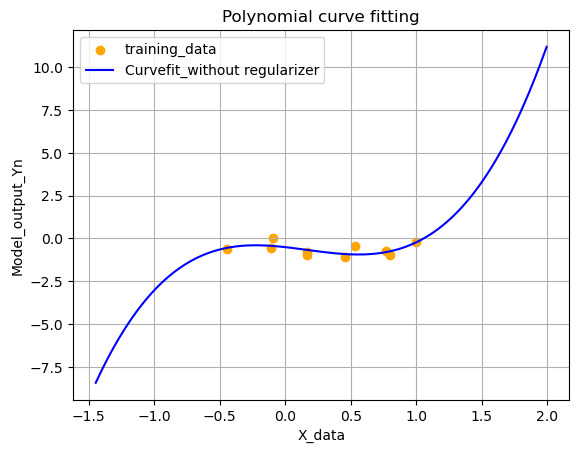

In [393]:
plotxy2(x,y,param,M,d)


Approximated function for dataset 1a ( M = 3 , without regularization )

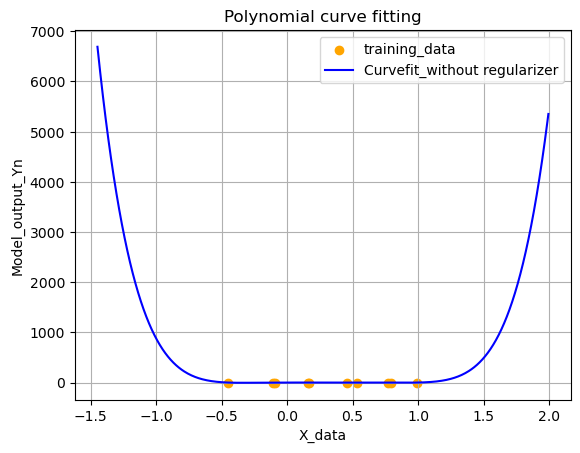

In [528]:
plotxy2(x,y,param,M,d)

Approximated function for dataset 1a ( M = 6 , without regularization )

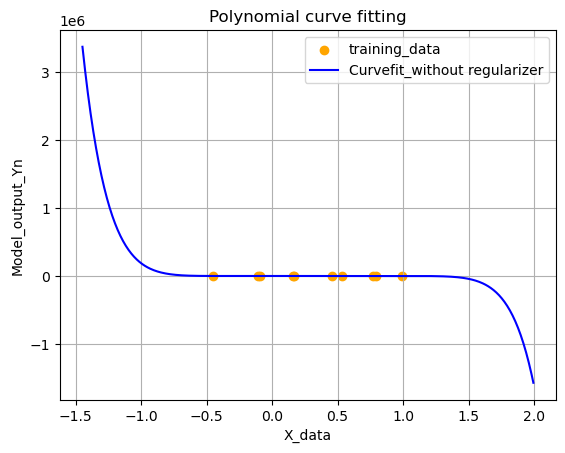

In [383]:
plotxy2(x,y,param,M,d)

Approximated function for dataset 1a ( M = 9 , without regularization )

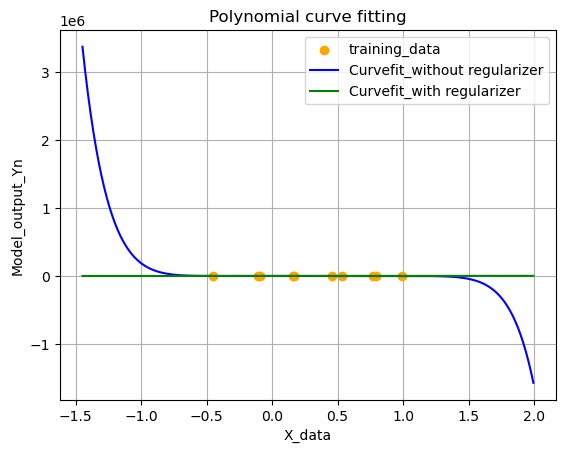

In [422]:
plotxy1(x,y,param,param_reg,M,d)

Approximated function for dataset 1a ( M = 9 , lambda = 0.001 , with regularization )

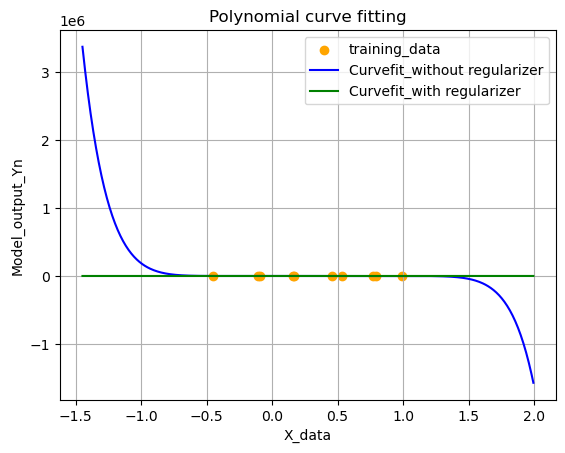

In [433]:
plotxy1(x,y,param,param_reg,M,d)

Approximated function for dataset 1a ( M = 9 , lambda = 0.1 , with regularization )

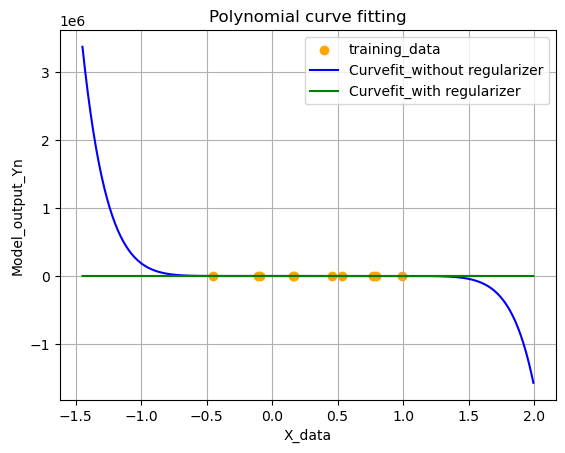

In [518]:
plotxy1(x,y,param,param_reg,M,d)

Approximated function for dataset 1a ( M = 9 , lambda = 1 , with regularization )

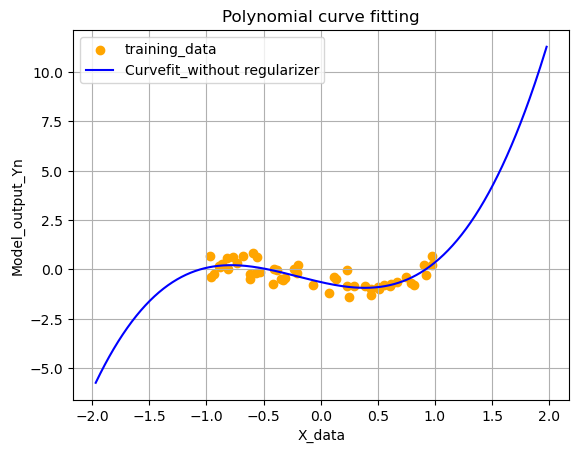

In [544]:
plotxy2(x,y,param,M,d)

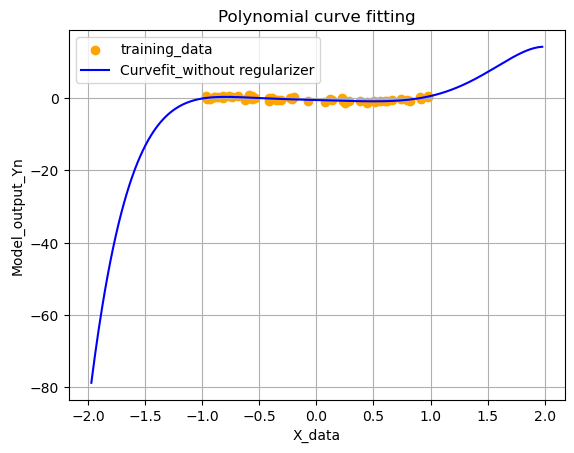

In [554]:
plotxy2(x,y,param,M,d)


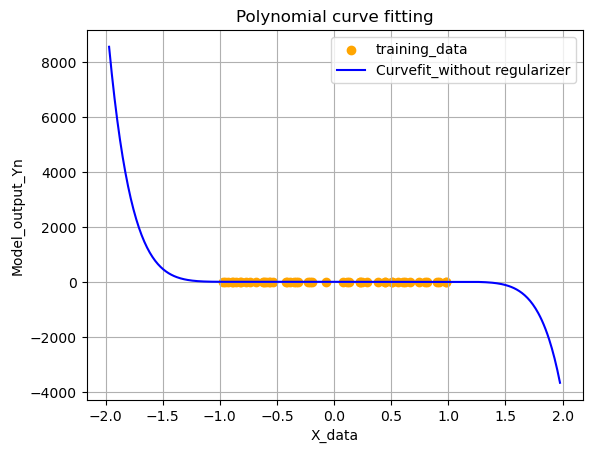

In [566]:
plotxy2(x,y,param,M,d)

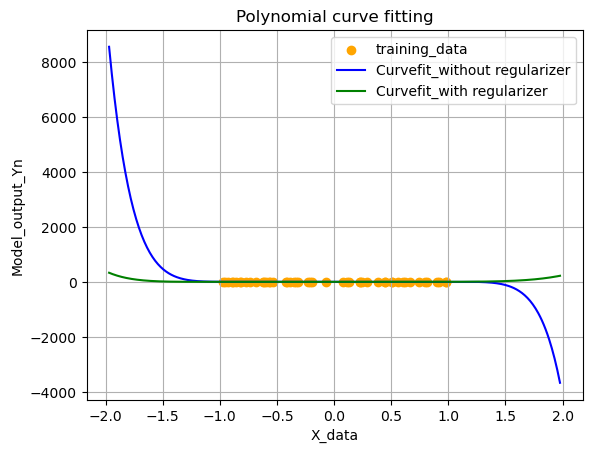

In [576]:
plotxy1(x,y,param,param_reg,M,d)

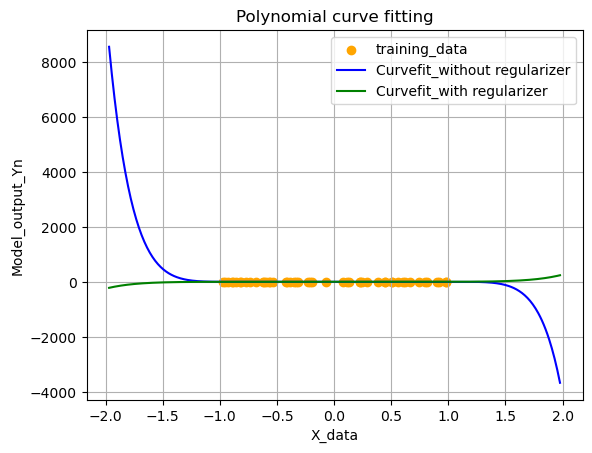

In [586]:
plotxy1(x,y,param,param_reg,M,d)

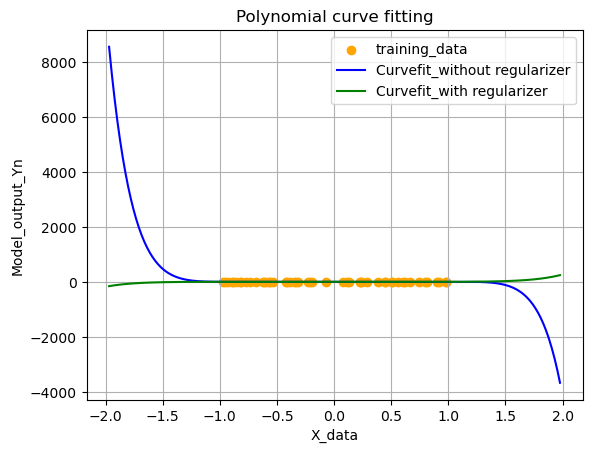

In [596]:
plotxy1(x,y,param,param_reg,M,d)

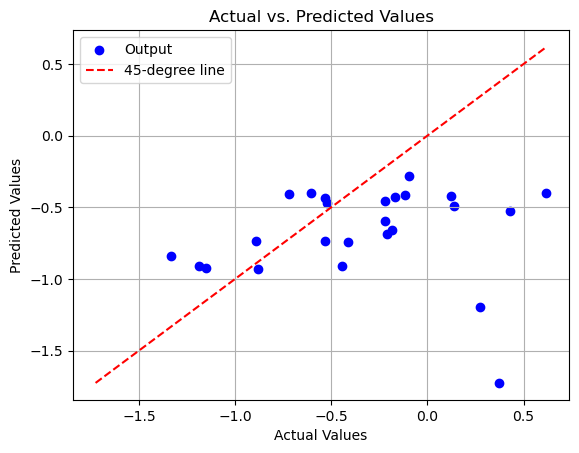

In [350]:
plotyy(y_act,y_pred)


For test data ( Without Regularization )

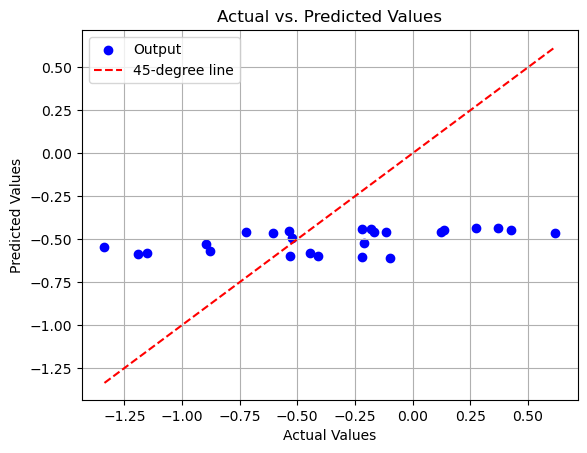

In [353]:
plotyy(y_act,y_pred_reg)


For test data ( With Regularization )

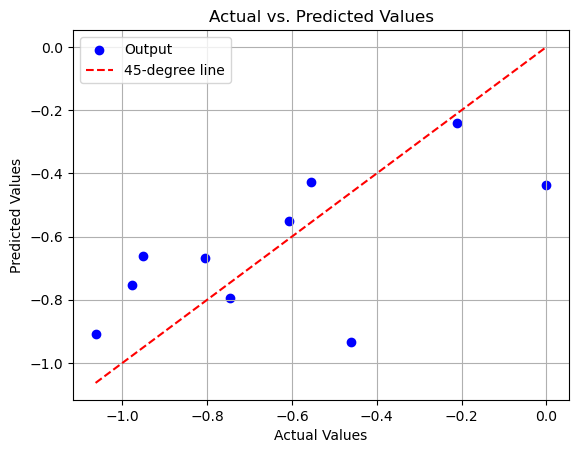

In [356]:
plotyy(y,y_pred_train)

For training data ( Without Regularization )

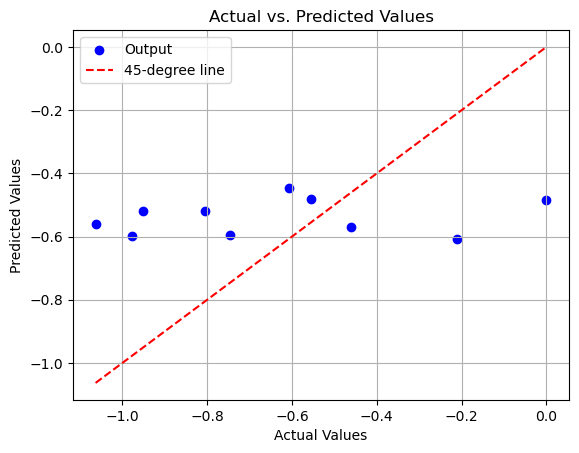

In [359]:
plotyy(y,y_pred_train_reg)